In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
import os 
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
matplotlib.rcParams["figure.dpi"] = 150
from particle import PDGID

In [2]:
datadir = './Simulation_Output/'
flp = 0

In [3]:
truthbib = pd.DataFrame()
recon2Dbib = pd.DataFrame()
truthsig = pd.DataFrame()
recon2Dsig = pd.DataFrame()

for file in os.listdir(datadir):
    if "labels" in file:
        if "bib" in file: 
            truthbib = pd.concat([truthbib,pd.read_parquet(f"{datadir}{file}")])
            file = file.replace("labels","recon2D")
            recon2Dbib = pd.concat([recon2Dbib,pd.read_parquet(f"{datadir}{file}")])
        elif "sig" in file: 
            truthsig = pd.concat([truthsig,pd.read_parquet(f"{datadir}{file}")])
            file = file.replace("labels","recon2D")
            recon2Dsig = pd.concat([recon2Dsig,pd.read_parquet(f"{datadir}{file}")])
            
clustersSig = recon2Dsig.to_numpy().reshape(recon2Dsig.shape[0],13,21)
clustersBib = recon2Dbib.to_numpy().reshape(recon2Dbib.shape[0],13,21)

print(f"# of bib clusters: {len(truthbib)}\n# of sig clusters {len(truthsig)}")
print(f"Total # of clusters: {len(truthbib)+len(truthsig)}")

# of bib clusters: 34550
# of sig clusters 38446
Total # of clusters: 72996


In [12]:
def get_charge_center(cluster):
    charge = np.zeros(13)
    pixelNo = np.arange(0,13) 
    for i in range(13):
        charge[i] = np.sum(cluster[i])

    centery = int(np.round(np.sum(charge*pixelNo)/np.sum(charge)))

    clusterTest = cluster.T
    charge = np.zeros(21)
    pixelNo = np.arange(0,21) 
    for i in range(21):
        charge[i] = np.sum(clusterTest[i])

    centerx = int(np.round(np.sum(charge*pixelNo)/np.sum(charge)))

    return centerx, centery

In [13]:
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white","red","darkred"])

def plotSingleCluster(cluster):
    fig, ax = plt.subplots(figsize=(7,5),dpi=200)

    # Plot charge collected in each pixel
    datamin = cluster.min()
    datamax = cluster.max()
    im = ax.imshow(cluster, vmin=datamin, vmax=datamax, cmap=cmap, interpolation='nearest')
    centerx, centery = get_charge_center(cluster)
    ax.hlines(y=centery,xmax=20,xmin=0)
    ax.vlines(x=centerx,ymax=12, ymin=0)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='4%', pad=0.05)
    fig.colorbar(im, cax=cax, location='right',label='Number of eh pairs')
    ax.set_title("Charge collected by 4 ns")

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='4%', pad=0.05)
    fig.colorbar(im, cax=cax, location='right',label='Number of eh pairs')

    # Draw grid on both
    ax.set_xlim(-0.5,20.5)
    ax.set_ylim(-0.5,12.5)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax.grid(which="minor", color="grey", linestyle='-', linewidth=0.5,snap=False)
    
    plt.tight_layout(pad=3.5)
    fig.canvas.draw()

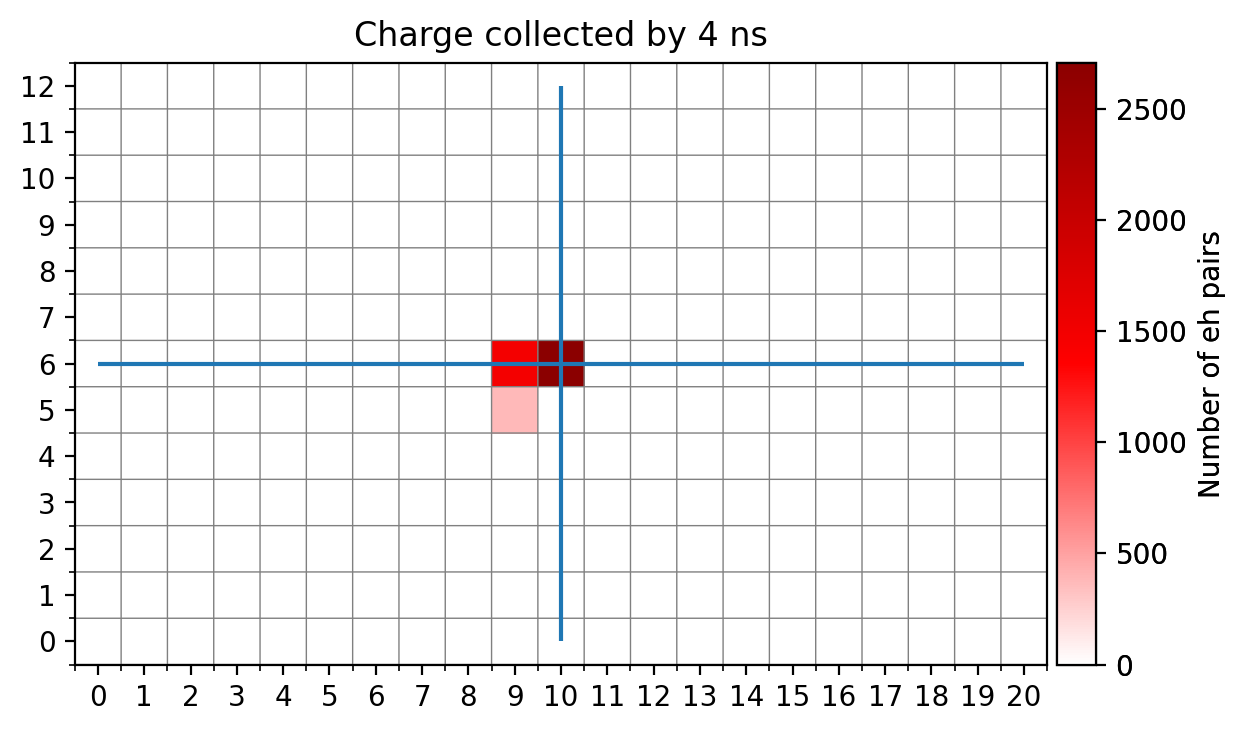

In [15]:
plotSingleCluster(clustersBib[10])

In [19]:
truthsig['z-global']

0       4.400000
1      26.550001
2      27.175001
3     -46.375000
4     -22.100000
         ...    
492    22.775000
493    -1.150000
494    -4.150000
495   -17.700000
496    15.150000
Name: z-global, Length: 38446, dtype: float64

In [20]:
min(truthsig['z-global'])

-65.025